## Part B

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests
import json
import numpy as np
from numpy import mean, where
import sklearn
from sklearn import metrics
import time

from collections import Counter
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, log_loss, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, scale
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as ul
import time
import glob

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import random

In [3]:
# Load the cleaned dataset 

partB = pd.read_csv("/Users/buynow/Desktop/Business Analytics Practicum/IntegrityM/PartB/PARTB_Dataset_Clean/partB_new3.csv")

In [4]:
partB.head()

,NPI,Type,HCPCS_Cd,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Fraud
0,1003000126,Internal Medicine,99222,F,341,357.0,357,416.546218,137.749188,107.517871,106.715294,0
1,1003000126,Internal Medicine,99223,F,98,98.0,98,611.000000,201.096837,152.551224,153.220204,0
2,1003000126,Internal Medicine,99231,F,65,104.0,104,119.000000,39.086731,30.835385,30.677115,0
3,1003000126,Internal Medicine,99232,F,596,1418.0,1418,217.000000,71.698611,56.297757,56.080226,0
4,1003000126,Internal Medicine,99233,F,104,175.0,175,312.000000,103.830000,82.398171,81.520343,0


In [5]:
partB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65689620 entries, 0 to 65689619
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   NPI                 int64  
 1   Type                object 
 2   HCPCS_Cd            object 
 3   Place_Of_Srvc       object 
 4   Tot_Benes           int64  
 5   Tot_Srvcs           float64
 6   Tot_Bene_Day_Srvcs  int64  
 7   Avg_Sbmtd_Chrg      float64
 8   Avg_Mdcr_Alowd_Amt  float64
 9   Avg_Mdcr_Pymt_Amt   float64
 10  Avg_Mdcr_Stdzd_Amt  float64
 11  Fraud               int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 5.9+ GB


In [6]:
partB.describe()

,NPI,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Fraud
count,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07
mean,1.499660e+09,9.031896e+01,1.818968e+02,1.454569e+02,3.478680e+02,9.974329e+01,7.798777e+01,7.875559e+01,5.120748e-04
std,2.877647e+08,1.190249e+03,4.335369e+03,2.253212e+03,1.011582e+03,2.449331e+02,1.952078e+02,1.949382e+02,2.262328e-02
min,1.003000e+09,1.100000e+01,2.400000e+00,1.100000e+01,6.547619e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245670e+09,1.700000e+01,2.000000e+01,2.000000e+01,6.000000e+01,2.450993e+01,2.000927e+01,2.046985e+01,0.000000e+00
50%,1.497967e+09,3.300000e+01,4.200000e+01,4.100000e+01,1.460000e+02,6.526646e+01,4.813585e+01,4.945000e+01,0.000000e+00
75%,1.740628e+09,7.700000e+01,1.140000e+02,1.080000e+02,2.977647e+02,1.123109e+02,8.622229e+01,8.582000e+01,0.000000e+00
max,1.993000e+09,9.186660e+05,6.680015e+06,2.290529e+06,9.999999e+04,5.440466e+04,4.334680e+04,4.334680e+04,1.000000e+00


### Ratio of Fraud and Non-fraud classes 

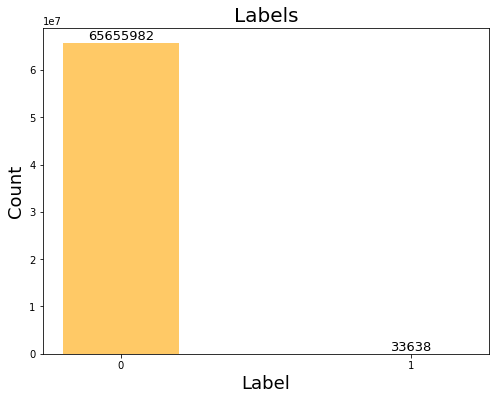

In [7]:
fig = plt.figure(figsize=(8, 6))

# Plot the bar graph
Y_fraud = list(partB["Fraud"].value_counts())
X_fraud = ["0", "1"]

plot = plt.bar(X_fraud, Y_fraud, 
               width = 0.4,
              color = "orange",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)
 
# Add labels and title
plt.title("Labels", fontsize = 20)
plt.xlabel("Label", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
 
# Display the graph on the screen
plt.show()

In [8]:
ratio = partB["Fraud"].value_counts(normalize = True) 
print("Fraud: ", round(ratio[0]*100, 2), "%")
print("Non-Fraud: ", round(ratio[1]*100, 2), "%")

Fraud:  99.95 %
Non-Fraud:  0.05 %


### Undersampling

In [9]:
from imblearn import under_sampling

In [10]:
partB["Fraud"] = partB["Fraud"].astype(int)

In [11]:
# Assign X and y features
feature = list(partB.columns)

feature.remove("Fraud")

target = "Fraud"

In [ ]:
undersample = under_sampling.RandomUnderSampler(sampling_strategy=0.1)
X, y = undersample.fit_resample(partB[feature], partB[[target]])

In [ ]:
under_partB = pd.concat([X, y], axis = 1)
under_partB.head()

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(121)

# Plot the bar graph for the original train
Y_fraud = list(partB[target].value_counts())
Labels = ["0", "1"]

plot = plt.bar(Labels, Y_fraud, 
               width = 0.4,
              color = "blue",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)

# Add labels and title
plt.title("Original", fontsize = 20)
plt.xlabel("Label", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)


plt.subplot(122)

# Plot the bar graph for the over-sampled train
Y_fraud_under = list(under_partB[target].value_counts())

plot_under = plt.bar(Labels, Y_fraud_under, 
               width = 0.4,
              color = "orange",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot_under:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)

# Add labels and title
plt.title("Under-Sampling", fontsize = 20)
plt.xlabel("Label", fontsize = 18)

# Display the graph on the screen
plt.show()

In [ ]:
# scatter plot of the data transformed by SMOTE 
# x-axis = "Tot_Benes_mean"
# y-axis = "Tot_Bene_Day_Srvcs_mean"

plt.figure(figsize=(10, 10))

counter = Counter(y)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X.iloc[row_ix, 4], X.iloc[row_ix, 6], label=str(label))
plt.legend()
plt.show()

In [ ]:
under_partB.to_csv('under.csv', index=False)

## Import data after under-sampling

In [3]:
pwd

'/home/ec2-user/SageMaker'

In [4]:
under_partB = pd.read_csv("/home/ec2-user/SageMaker/under.csv")

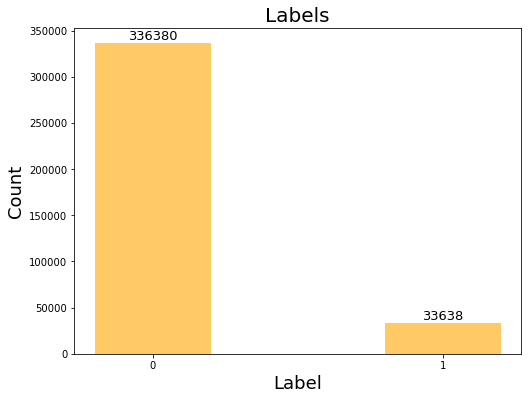

In [5]:
fig = plt.figure(figsize=(8, 6))

# Plot the bar graph
Y_fraud = list(under_partB["Fraud"].value_counts())
X_fraud = ["0", "1"]

plot = plt.bar(X_fraud, Y_fraud, 
               width = 0.4,
              color = "orange",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)
 
# Add labels and title
plt.title("Labels", fontsize = 20)
plt.xlabel("Label", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
 
# Display the graph on the screen
plt.show()

# Logistic Regression

### Both Log transformation and square root transformation create lots of NaN values

In [6]:
under_partB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370018 entries, 0 to 370017
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NPI                 370018 non-null  int64  
 1   Type                370018 non-null  object 
 2   HCPCS_Cd            370018 non-null  object 
 3   Place_Of_Srvc       370018 non-null  object 
 4   Tot_Benes           370018 non-null  int64  
 5   Tot_Srvcs           370018 non-null  float64
 6   Tot_Bene_Day_Srvcs  370018 non-null  int64  
 7   Avg_Sbmtd_Chrg      370018 non-null  float64
 8   Avg_Mdcr_Alowd_Amt  370018 non-null  float64
 9   Avg_Mdcr_Pymt_Amt   370018 non-null  float64
 10  Avg_Mdcr_Stdzd_Amt  370018 non-null  float64
 11  Fraud               370018 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 33.9+ MB


In [7]:
under_partB = under_partB.drop(columns=['HCPCS_Cd'])

In [8]:
# Assign X and y features

X_var = list(under_partB.columns)

for var in ["NPI", "Fraud", "Type", "Place_Of_Srvc"]:
    X_var.remove(var)

y_var = "Fraud"

In [9]:
# under_partB["Fraud"] = under_partB["Fraud"].astype(int)

In [10]:
# Split the whole dataset into train and test dataset
# Using a stratified random sampling so that the Fraud-class (1) data are evenly split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(under_partB[X_var], under_partB[y_var], test_size=0.2, stratify=under_partB["Fraud"])

# Also concatenate the split x & y dataframes 
tr_df = pd.concat([x_train, y_train], axis = 1)
te_df = pd.concat([x_test, y_test], axis = 1)

In [11]:
under_partB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370018 entries, 0 to 370017
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NPI                 370018 non-null  int64  
 1   Type                370018 non-null  object 
 2   Place_Of_Srvc       370018 non-null  object 
 3   Tot_Benes           370018 non-null  int64  
 4   Tot_Srvcs           370018 non-null  float64
 5   Tot_Bene_Day_Srvcs  370018 non-null  int64  
 6   Avg_Sbmtd_Chrg      370018 non-null  float64
 7   Avg_Mdcr_Alowd_Amt  370018 non-null  float64
 8   Avg_Mdcr_Pymt_Amt   370018 non-null  float64
 9   Avg_Mdcr_Stdzd_Amt  370018 non-null  float64
 10  Fraud               370018 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 31.1+ MB


array([[<AxesSubplot:title={'center':'Tot_Benes'}>,
        <AxesSubplot:title={'center':'Tot_Srvcs'}>,
        <AxesSubplot:title={'center':'Tot_Bene_Day_Srvcs'}>],
       [<AxesSubplot:title={'center':'Avg_Sbmtd_Chrg'}>,
        <AxesSubplot:title={'center':'Avg_Mdcr_Alowd_Amt'}>,
        <AxesSubplot:title={'center':'Avg_Mdcr_Pymt_Amt'}>],
       [<AxesSubplot:title={'center':'Avg_Mdcr_Stdzd_Amt'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

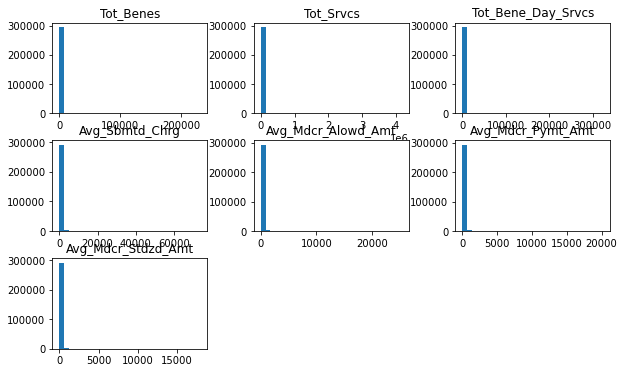

In [12]:
x_train.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [13]:
x_train.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Tot_Benes,130.581222,22609.373300
Tot_Srvcs,325.823518,120833.221626
Tot_Bene_Day_Srvcs,104.771325,15933.750416
Avg_Sbmtd_Chrg,19.314755,704.579919
Avg_Mdcr_Alowd_Amt,34.610323,2176.577678
Avg_Mdcr_Pymt_Amt,34.637003,2177.667379
Avg_Mdcr_Stdzd_Amt,34.959862,2200.131258


In [14]:
#final_logit = sm.Logit( y_train,sm.add_constant( X_train[significant_vars])).fit()
import statsmodels.api as sm
logit = sm.Logit(y_train.astype(int), x_train.astype(float))
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.450963
         Iterations 8


In [15]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Fraud   No. Observations:               296014
Model:                          Logit   Df Residuals:                   296007
Method:                           MLE   Df Model:                            6
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                 -0.4803
Time:                        17:49:43   Log-Likelihood:            -1.3349e+05
converged:                       True   LL-Null:                       -90176.
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Tot_Benes             -0.0041   7.04e-05    -58.492      0.000      -0.004      -0.004
Tot_Srvcs           5.627e-06   1.34e-06      4.206      0.000    3.01e-06    8.25e-06
Tot_Bene_Day_Srvcs     0.0006   1.76e-05     33.746      0.000       0.001       0.001
Avg_Sbmtd_Chrg        -0.0020   4.85e-05    -41.864      0.000      -0.002      -0.002
Avg_Mdcr_Alowd_Amt    -0.0045      0.001     -7.067      0.000      -0.006      -0.003
Avg_Mdcr_Pymt_Amt      0.0145      0.001     11.644      0.000       0.012       0.017
Avg_Mdcr_Stdzd_Amt    -0.0239      0.001    -23.356      0.000      -0.026      -0.022
======================================================================================
"""

### One-Hot Encoding

In [16]:
under_partB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370018 entries, 0 to 370017
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NPI                 370018 non-null  int64  
 1   Type                370018 non-null  object 
 2   Place_Of_Srvc       370018 non-null  object 
 3   Tot_Benes           370018 non-null  int64  
 4   Tot_Srvcs           370018 non-null  float64
 5   Tot_Bene_Day_Srvcs  370018 non-null  int64  
 6   Avg_Sbmtd_Chrg      370018 non-null  float64
 7   Avg_Mdcr_Alowd_Amt  370018 non-null  float64
 8   Avg_Mdcr_Pymt_Amt   370018 non-null  float64
 9   Avg_Mdcr_Stdzd_Amt  370018 non-null  float64
 10  Fraud               370018 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 31.1+ MB


In [17]:
# One-Hot Encoding 

# Convert the Fraud variable to object datatype
under_partB["Fraud"] = under_partB["Fraud"].astype(object)

# Encoding
encoded_partB = pd.get_dummies(under_partB, drop_first = True)

# Rename some of the changed variable names
encoded_partB.rename(columns = {"Fraud_1":"Fraud"}, inplace = True)

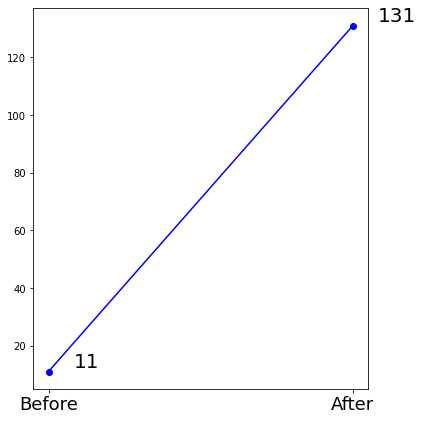

In [18]:
# Feature size of the encoded dataset 

fig, ax = plt.subplots(figsize=(6,7))

xs = ["Before", "After"]
ys = [len(under_partB.columns), len(encoded_partB.columns)]
ax.plot(xs, ys, "bo-")

for x,y in zip(xs, ys):
    label = "{:d}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(25,4), 
                 ha='left',
                fontsize = 20) 
    
ax.set_xticklabels(xs, fontsize=18)

plt.show()

In [19]:
list(encoded_partB.columns)

['NPI',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt',
 'Type_Advanced Heart Failure and Transplant Cardiology',
 'Type_All Other Suppliers',
 'Type_Allergy/ Immunology',
 'Type_Allergy/Immunology',
 'Type_Ambulance Service Provider',
 'Type_Ambulance Service Supplier',
 'Type_Ambulatory Surgical Center',
 'Type_Anesthesiologist Assistants',
 'Type_Anesthesiology',
 'Type_Anesthesiology Assistant',
 'Type_Audiologist',
 'Type_Audiologist (billing independently)',
 'Type_CRNA',
 'Type_Cardiac Electrophysiology',
 'Type_Cardiac Surgery',
 'Type_Cardiology',
 'Type_Cardiovascular Disease (Cardiology)',
 'Type_Centralized Flu',
 'Type_Certified Clinical Nurse Specialist',
 'Type_Certified Nurse Midwife',
 'Type_Certified Registered Nurse Anesthetist (CRNA)',
 'Type_Chiropractic',
 'Type_Clinic or Group Practice',
 'Type_Clinical Cardiac Electrophysiology',
 'Type_Clinical Cardiatric Electrophysiology

In [20]:
encoded_partB.head(5)

,NPI,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Type_Advanced Heart Failure and Transplant Cardiology,Type_All Other Suppliers,...,Type_Thoracic Surgery,Type_Undefined Physician type,Type_Undersea and Hyperbaric Medicine,Type_Unknown Physician Specialty Code,Type_Unknown Supplier/Provider,Type_Unknown Supplier/Provider Specialty,Type_Urology,Type_Vascular Surgery,Place_Of_Srvc_O,Fraud
0,1376707513,13,13.0,13,201.000000,52.013846,31.723846,31.016154,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1114941044,91,96.0,96,1224.083333,122.177188,96.416458,92.471771,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1629035647,20,20.0,20,1793.070000,530.940000,423.030000,427.030000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1275976219,34,459.0,180,60.430000,22.392266,17.952113,9.639564,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1124052253,17,17.0,17,180.000000,39.963529,31.839412,28.712941,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Spliting

In [21]:
# Assign X and y features

X_var = list(encoded_partB.columns)

for var in ["NPI", "Fraud"]:
    X_var.remove(var)

y_var = "Fraud"

In [22]:
under_partB["Fraud"] = under_partB["Fraud"].astype('category')

In [28]:
SEED = 146

In [29]:
# Split the whole dataset into train and test dataset
# Using a stratified random sampling so that the Fraud-class (1) data are evenly split into train & test sets

random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(encoded_partB[X_var], 
                                                    encoded_partB[y_var], 
                                                    test_size=0.2, 
                                                    stratify=encoded_partB["Fraud"], 
                                                    random_state = SEED)

# Also concatenate the split x & y dataframes 
tr_df = pd.concat([x_train, y_train], axis = 1)
te_df = pd.concat([x_test, y_test], axis = 1)

In [30]:
# Calculate the odds ratio of Fraud & Non-fraud labels for train & test sets

train_0 = len(tr_df[tr_df["Fraud"] == 0])
train_1 = len(tr_df[tr_df["Fraud"] == 1])

test_0 = len(te_df[te_df["Fraud"] == 0])
test_1 = len(te_df[te_df["Fraud"] == 1])

split_df = pd.DataFrame({"x_axis":["Train", "Test"], 
                         "Ratio":[train_1/train_0*100, test_1/test_0*100]})

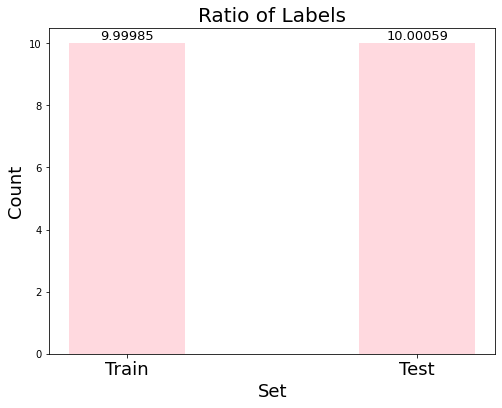

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bar graph
plot = plt.bar(split_df["x_axis"], split_df["Ratio"], 
               width = 0.4,
              color = "pink",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%.5f' % height, ha='center', va='bottom', 
             fontsize = 13)
 
# Add labels and title
plt.title("Ratio of Labels", fontsize = 20)
plt.xlabel("Set", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

ax.set_xticklabels(split_df["x_axis"], fontsize=18)

# Display the graph on the screen
plt.show()

### Histogram

In [31]:
cont_features = encoded_partB.columns[1:8].tolist()


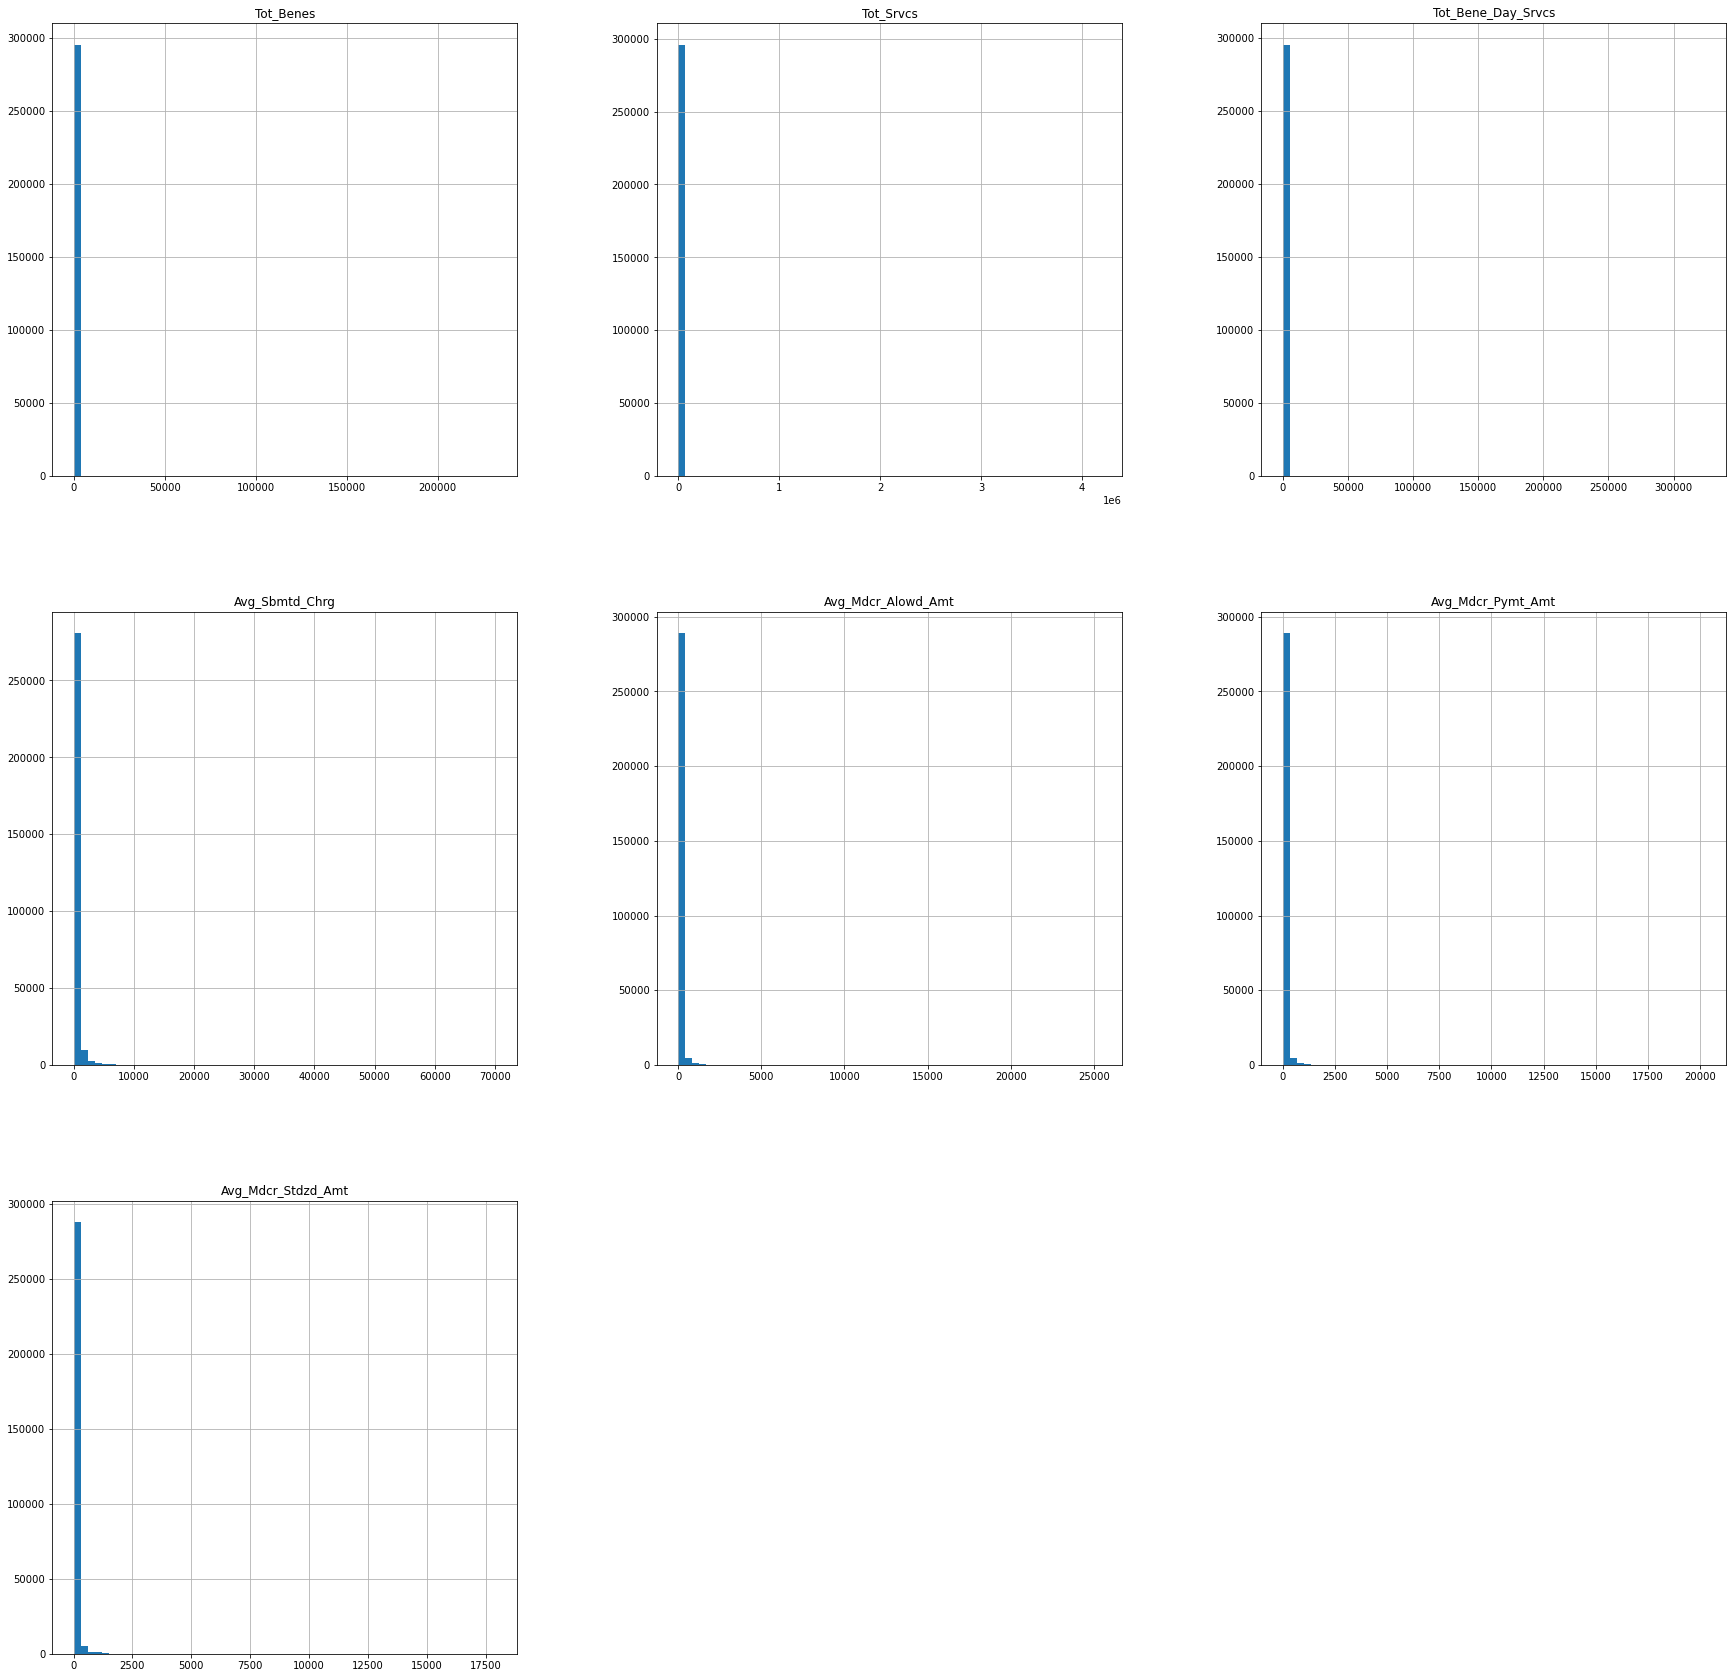

In [32]:
# Histograms


_ = tr_df[cont_features].hist(bins=60, figsize=(30, 30))

### Heat map for correlations

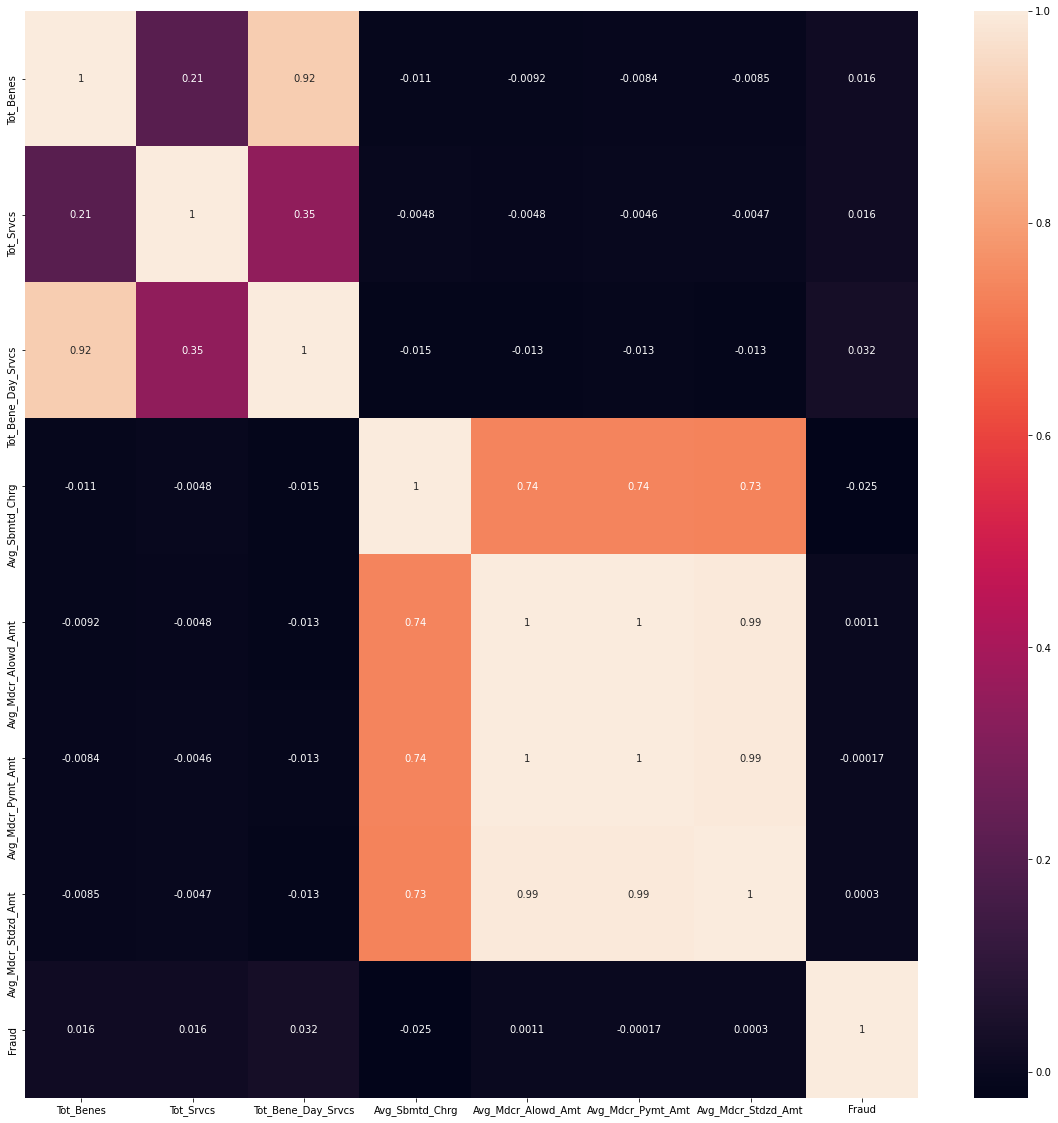

In [33]:
# Check Multicollinearity 
plt.figure(figsize = (20,20))

corr = encoded_partB[cont_features + [y_var]].corr()
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, annot = True)

### box plot

In [34]:
# in order to draw the box plots of all the features in the same y-axis, scale the variables
scaled_tr = pd.DataFrame(scale(tr_df[cont_features]), columns = cont_features)

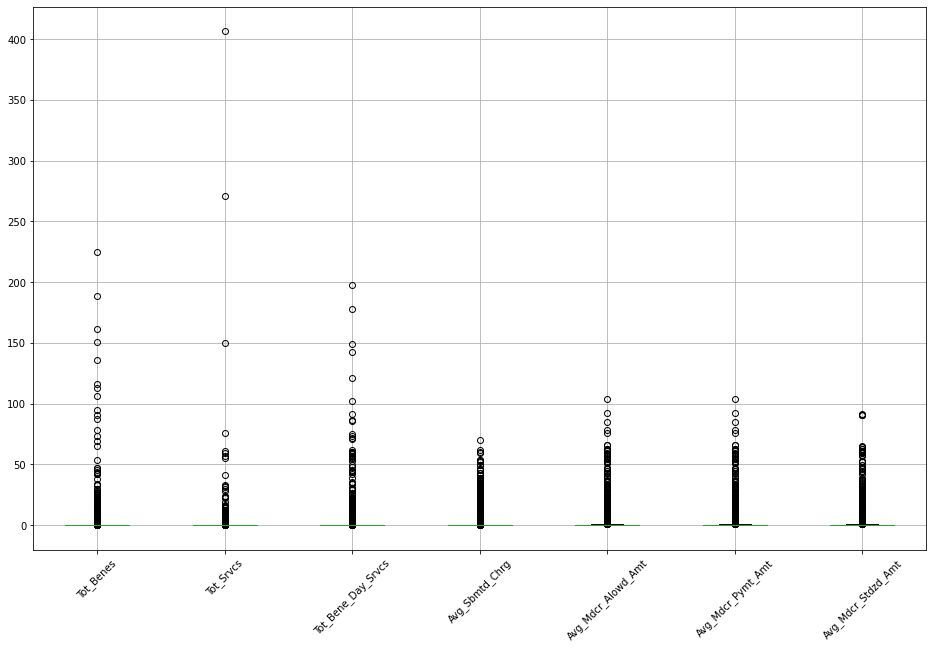

In [35]:
# box plots for the continous variables 
plt.figure(figsize=(16, 10))

scaled_tr.boxplot()
plt.xticks(rotation=45)
plt.show()

### Outlier Detection

In [36]:
# Outlier = |z-score| > 3
def detect_outlier(var_list):
    
    threshold=3
    outliers_idx = {}
    outliers_data = {}
    
    
    for col in var_list:
        
        mean1 = np.mean(tr_df[col])
        std1 =np.std(tr_df[col])

        z_score = np.abs((tr_df[col] - mean1)/std1)
        outliers_idx[col] =  z_score.index[z_score > threshold].tolist()
        outliers_data[col] =  z_score[z_score > threshold].tolist()
       
    return outliers_idx, outliers_data

In [37]:
outliers_idx_dict, outliers_data_dict = detect_outlier(cont_features)

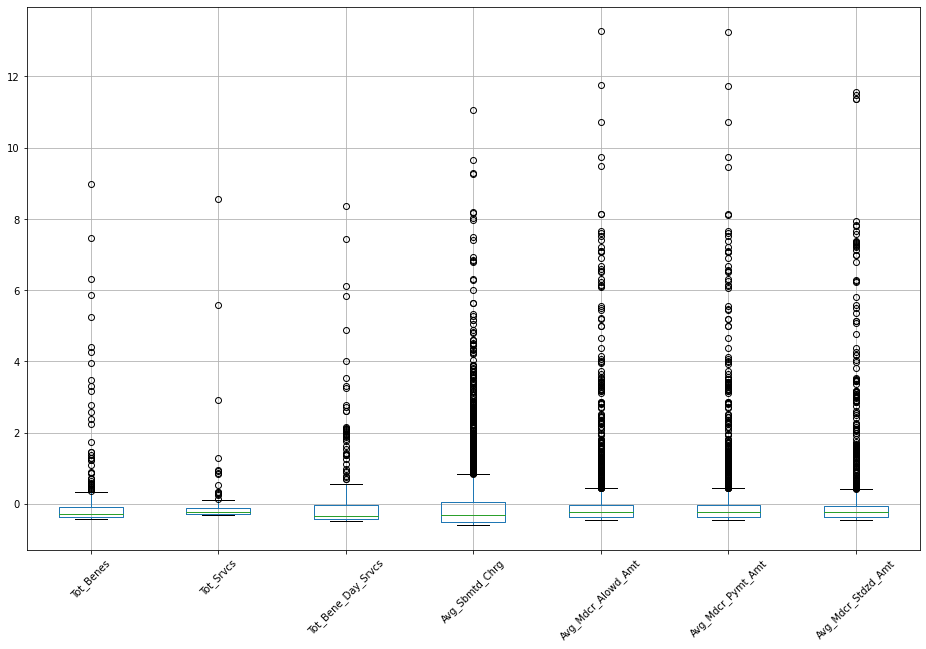

In [38]:
# Outliers of the outliers
outlier_df = pd.DataFrame({key:pd.Series(value) for key, value in outliers_data_dict.items()})

# To draw the box plots of all the features in the same y-axis, scale the variables
scaled_outlier = pd.DataFrame(scale(outlier_df[cont_features]), columns = cont_features)

# Plot
plt.figure(figsize=(16, 10))

scaled_outlier.boxplot()
plt.xticks(rotation=45)
plt.show()

In [39]:
# Find the unique indeces of the detected outliers

outliers_list = outliers_idx_dict.get("Tot_Benes")
for i in np.arange(1, len(cont_features)):
    outliers_list.extend(outliers_idx_dict.get(cont_features[i]))
    
outlier_uniq_idx = np.unique(outliers_list).tolist()


# delete the ourlier rows from the train set

orgl_len = len(tr_df)

tr_df_new = tr_df.drop(index = outlier_uniq_idx, axis = 0)

deleted_rows = orgl_len - len(tr_df_new)
print("the number of deleted rows: %d" % deleted_rows)

the number of deleted rows: 4875


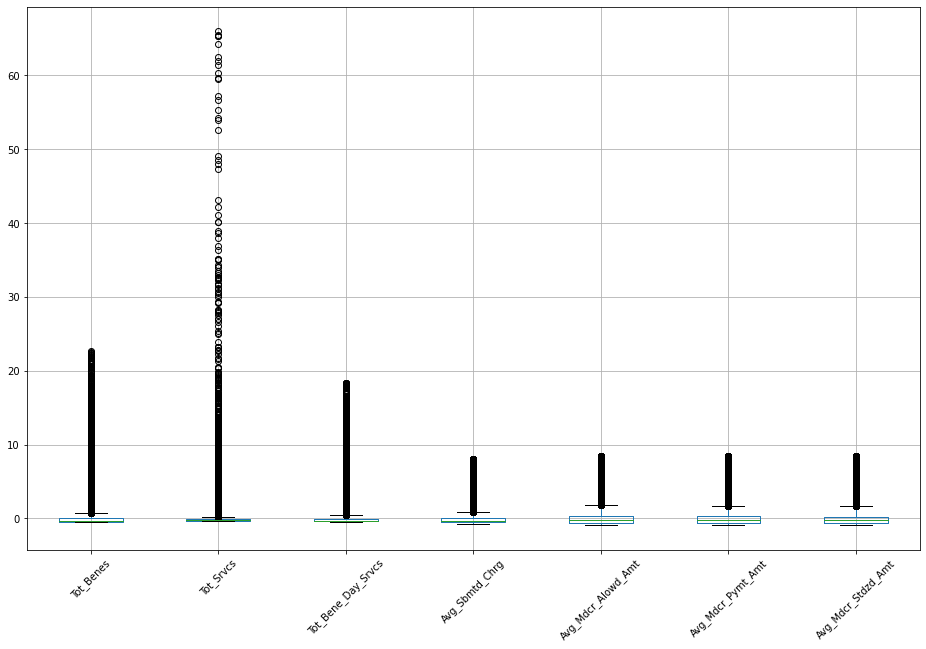

In [40]:
# Box plots for Outlier-free train set

# To draw the box plots of all the features in the same y-axis, scale the variables
scaled_tr_outlierFree = pd.DataFrame(scale(tr_df_new[cont_features]), columns = cont_features)

# box plots for the continous variables 
plt.figure(figsize=(16, 10))

scaled_tr_outlierFree.boxplot()
plt.xticks(rotation=45)
plt.show()

data are extremely skewed to the right

### Log_transformation

In [41]:
log_x_train = np.log10(tr_df_new[cont_features])

In [42]:
log_x_train

,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
312146,1.278754,1.278754,1.278754,2.278754,2.262522,2.262522,2.232844
200008,1.230449,1.255273,1.255273,2.189864,1.258584,1.104961,1.171661
359060,2.049218,2.152288,2.152288,2.113943,1.986606,1.888533,1.924743
328059,1.255273,1.301030,1.301030,2.272422,2.153789,1.988064,1.996945
251990,1.041393,1.041393,1.041393,2.756811,2.041472,1.942801,1.966423
...,...,...,...,...,...,...,...
117524,1.785330,1.792392,1.792392,2.915400,2.469566,2.368595,2.381459
79565,1.672098,1.672098,1.672098,2.149219,1.483496,1.384887,1.328184
365742,1.518514,1.623249,1.623249,3.026086,2.670480,2.572245,2.558707
312924,1.041393,1.041393,1.041393,2.350952,2.044422,1.945764,1.945419


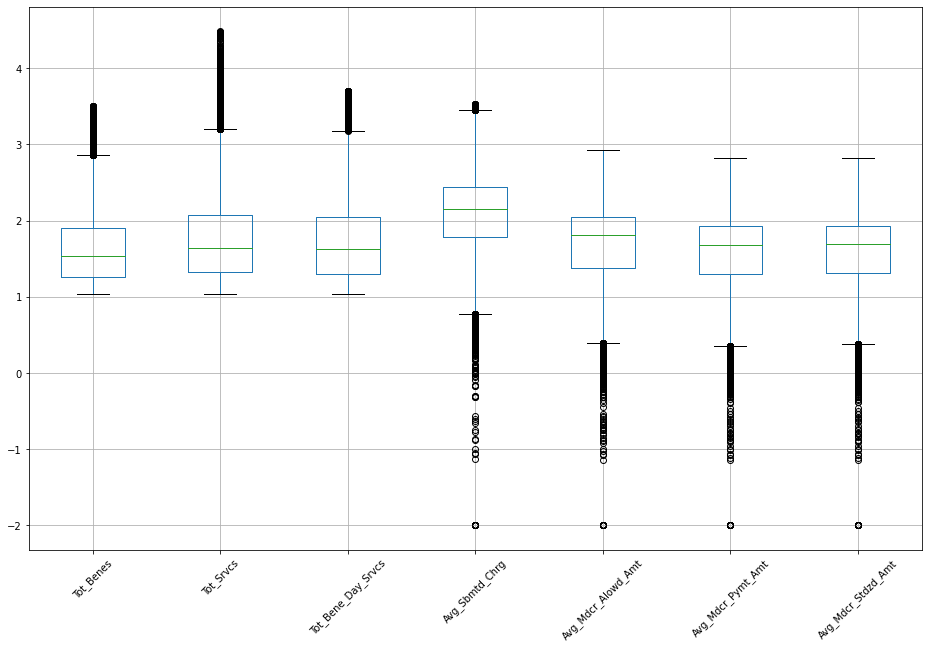

In [43]:
plt.figure(figsize=(16, 10))

log_x_train.boxplot()
plt.xticks(rotation=45)
plt.show()

### Square root_transformation

In [44]:
sqr_x_train = np.sqrt(tr_df_new[cont_features])

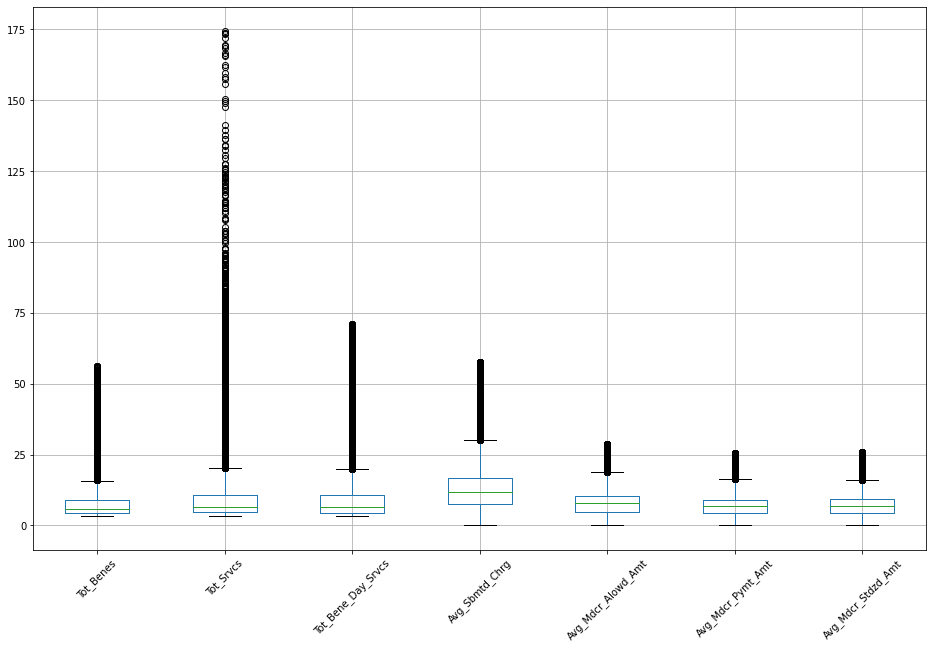

In [45]:
plt.figure(figsize=(16, 10))

sqr_x_train.boxplot()
plt.xticks(rotation=45)
plt.show()

### -----------------SMOTE---------------------

In [46]:
tr_df.head()

,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Type_Advanced Heart Failure and Transplant Cardiology,Type_All Other Suppliers,Type_Allergy/ Immunology,...,Type_Thoracic Surgery,Type_Undefined Physician type,Type_Undersea and Hyperbaric Medicine,Type_Unknown Physician Specialty Code,Type_Unknown Supplier/Provider,Type_Unknown Supplier/Provider Specialty,Type_Urology,Type_Vascular Surgery,Place_Of_Srvc_O,Fraud
312146,19,19.0,19,190.000000,183.030000,183.030000,170.940000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
200008,17,18.0,18,154.833333,18.137778,12.733889,14.847778,0,0,0,...,0,0,0,0,0,0,0,0,1,0
359060,112,142.0,142,130.000000,96.962958,77.362958,84.089718,0,0,0,...,0,0,0,0,0,0,0,0,0,1
328059,18,20.0,20,187.250000,142.491500,97.289000,99.299000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
251990,11,11.0,11,571.230000,110.020000,87.660000,92.560000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scatter Plot of The Imbalanced Data

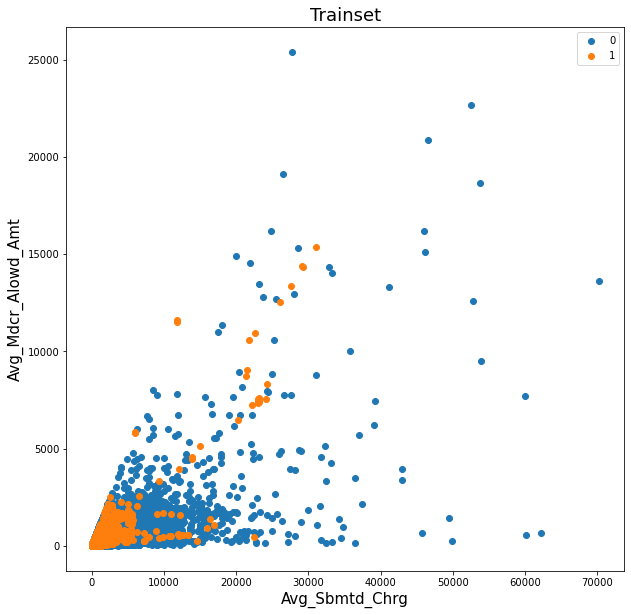

In [47]:
# scatter plot of the imbalanced data
# x-axis = "Tot_Benes_mean"
# y-axis = "Tot_Bene_Day_Srvcs_mean"

plt.figure(figsize=(10, 10))

counter = Counter(tr_df[y_var])
for label, _ in counter.items():
    row_ix = where(tr_df[y_var] == label)[0]
    plt.scatter(tr_df[X_var].iloc[row_ix, 3], tr_df[X_var].iloc[row_ix, 4], label=str(label))

plt.title("Trainset", fontsize = 18)
plt.xlabel("Avg_Sbmtd_Chrg", fontsize = 15)
plt.ylabel("Avg_Mdcr_Alowd_Amt", fontsize = 15)
plt.legend()
plt.show()

### Over-Sampling the imbalnaced data through SMOTE


In [48]:
conda install -c conda-forge imbalanced-learn

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::seaborn-base==0.11.1=pyhd8ed1ab_1
  - conda-forge/noarch::nbclassic==0.2.6=pyhd8ed1ab_0
  - conda-forge/noarch::typing-extensions==3.7.4.3=0
  - conda-forge/linux-64::pluggy==0.13.1=py36h5fab9bb_4
  - conda-forge/linux-64::blaze==0.11.3=py36_0
  - conda-forge/linux-64::matplotlib==3.3.4=py36h5fab9bb_0
  - defaults/linux-64::_anaconda_depends==5.1.0=py36_2
  - conda-forge/noarch::python-language-server==0.36.2=pyhd8ed1ab_0
  - conda-forge/noarch::jupyterlab_server==2.3.0=pyhd8ed1ab_0
  - conda-forge/noarch::pyls-black==0.4.6=pyh9f0ad1d_0
  - conda-forge/linux-64::scikit-image==0.16.2=py36hb3f55d8_0
  - conda-forge/noarch::path.py==12.5.0=0
  - conda-forge/noarch::qdarkstyle==2.8.1=pyhd8ed1ab_2
  - conda-forge/noarch::ipywidgets==7.6.3=pyhd3deb0d_0
  - conda-forge/noarch::black==20.8b1=py_1
  - conda-forge/linux-64

In [49]:
from imblearn import over_sampling, under_sampling

# transform the dataset
oversample = over_sampling.SMOTE()
tr_X, tr_y = oversample.fit_resample(tr_df[X_var], tr_df[y_var])

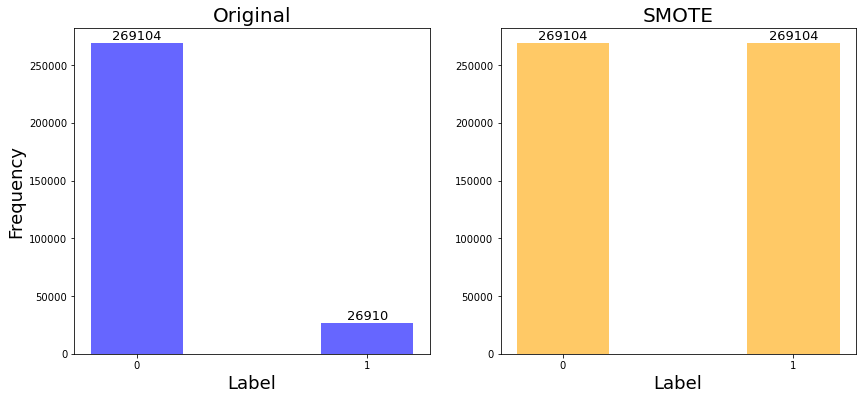

In [50]:
plt.figure(figsize=(14, 6))
plt.subplot(121)

# Plot the bar graph for the original train
Y_fraud = list(y_train.value_counts())
Labels = ["0", "1"]

plot = plt.bar(Labels, Y_fraud, 
               width = 0.4,
              color = "blue",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)

# Add labels and title
plt.title("Original", fontsize = 20)
plt.xlabel("Label", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)


plt.subplot(122)

# Plot the bar graph for the over-sampled train
Y_fraud_smote = list(tr_y.value_counts())

plot_smote = plt.bar(Labels, Y_fraud_smote, 
               width = 0.4,
              color = "orange",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot_smote:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)

# Add labels and title
plt.title("SMOTE", fontsize = 20)
plt.xlabel("Label", fontsize = 18)

# Display the graph on the screen
plt.show()

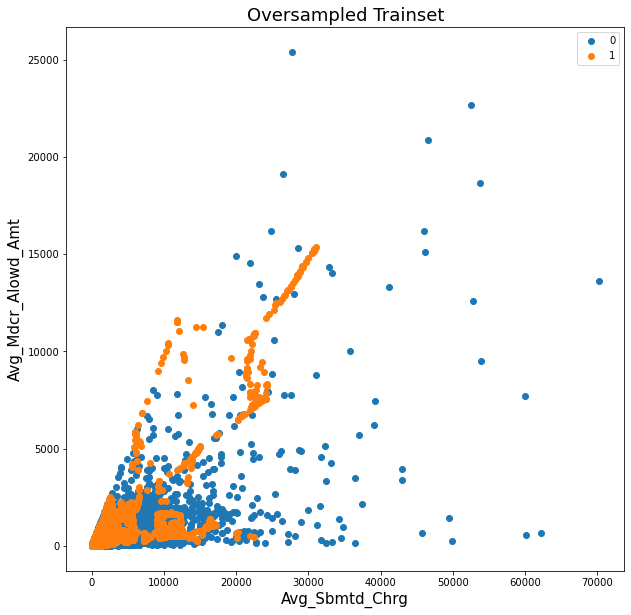

In [51]:
# scatter plot of the data transformed by SMOTE 
# x-axis = "Tot_Benes_mean"
# y-axis = "Tot_Bene_Day_Srvcs_mean"

plt.figure(figsize=(10, 10))

counter = Counter(tr_y)
for label, _ in counter.items():
    row_ix = where(tr_y == label)[0]
    plt.scatter(tr_X.iloc[row_ix, 3], tr_X.iloc[row_ix, 4], label=str(label))

plt.title("Oversampled Trainset", fontsize = 18)
plt.xlabel("Avg_Sbmtd_Chrg", fontsize = 15)
plt.ylabel("Avg_Mdcr_Alowd_Amt", fontsize = 15)
plt.legend()
plt.show()

### ------------------SMOTE & Under-Sampling-------------------------

In [52]:
from imblearn.pipeline import Pipeline
# SMOTE the Fraud data increasing its size to a 10% of the number of Non-fraud data 
# and then reduce the number of Non-fraud data to have 50 percent more than the Fraud data using random under-sampling
over = over_sampling.SMOTE(sampling_strategy=0.3)
under = under_sampling.RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [53]:
# transform the dataset
#tr_X, tr_y = pipeline.fit_resample(x_train, y_train)

tr_X, tr_y = pipeline.fit_resample(tr_df[X_var], tr_df[y_var])

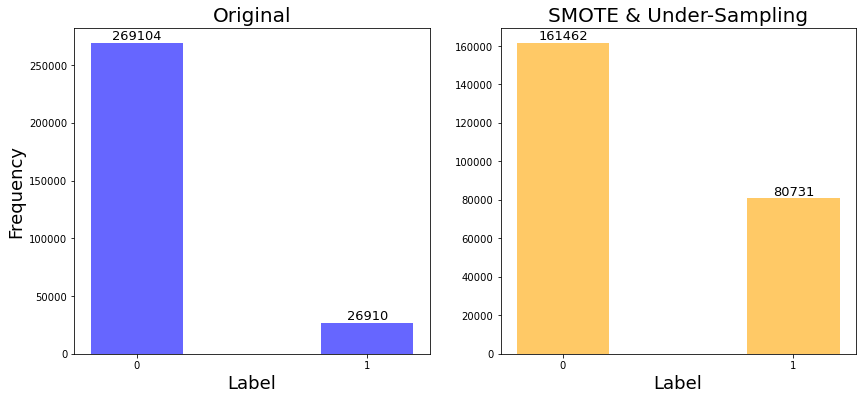

In [54]:
plt.figure(figsize=(14, 6))
plt.subplot(121)

# Plot the bar graph for the original train
Y_fraud = list(tr_df[y_var].value_counts())
Labels = ["0", "1"]

plot = plt.bar(Labels, Y_fraud, 
               width = 0.4,
              color = "blue",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)

# Add labels and title
plt.title("Original", fontsize = 20)
plt.xlabel("Label", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)


# After SMOTE & Random Undersampling transformation 
plt.subplot(122)

# Plot the bar graph for SMOTE & Undersampled train
Y_fraud = list(tr_y.value_counts())
X_fraud = ["0", "1"]

plot = plt.bar(X_fraud, Y_fraud, 
               width = 0.4,
              color = "orange",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)
 
# Add labels and title
plt.title("SMOTE & Under-Sampling", fontsize = 20)
plt.xlabel("Label", fontsize = 18)
 
# Display the graph on the screen
plt.show()

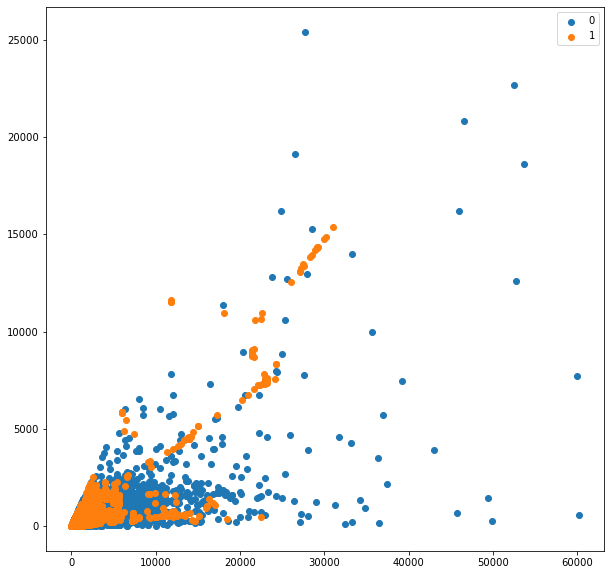

In [55]:
# scatter plot of the data transformed by SMOTE 
# x-axis = "Tot_Benes_mean"
# y-axis = "Tot_Bene_Day_Srvcs_mean"

plt.figure(figsize=(10, 10))

counter = Counter(tr_y)
for label, _ in counter.items():
    row_ix = where(tr_y == label)[0]
    plt.scatter(tr_X.iloc[row_ix, 3], tr_X.iloc[row_ix, 4], label=str(label))
plt.legend()
plt.show()

### Logistic regression on Log_transformation

In [57]:
log_x = log_x_train.join(tr_df_new['Fraud'])

In [58]:
log_x['Fraud'].value_counts()

0    264638
1     26501
Name: Fraud, dtype: int64

In [59]:
log_x.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Tot_Benes,0.792112,0.083081
Tot_Srvcs,0.841642,0.255752
Tot_Bene_Day_Srvcs,0.792728,0.031442
Avg_Sbmtd_Chrg,-0.067010,0.126076
Avg_Mdcr_Alowd_Amt,-0.571072,0.110143
Avg_Mdcr_Pymt_Amt,NaN,NaN
Avg_Mdcr_Stdzd_Amt,NaN,NaN
Fraud,2.843622,6.086228


In [60]:
log_2x = log_x.drop(log_x.columns[[5, 6]], axis=1)
log_2x

,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Fraud
312146,1.278754,1.278754,1.278754,2.278754,2.262522,0
200008,1.230449,1.255273,1.255273,2.189864,1.258584,0
359060,2.049218,2.152288,2.152288,2.113943,1.986606,1
328059,1.255273,1.301030,1.301030,2.272422,2.153789,0
251990,1.041393,1.041393,1.041393,2.756811,2.041472,0
...,...,...,...,...,...,...
117524,1.785330,1.792392,1.792392,2.915400,2.469566,0
79565,1.672098,1.672098,1.672098,2.149219,1.483496,0
365742,1.518514,1.623249,1.623249,3.026086,2.670480,1
312924,1.041393,1.041393,1.041393,2.350952,2.044422,0


In [61]:
log_2x["Fraud"] = log_2x["Fraud"].astype("float")

In [62]:
X_var = list(log_2x.columns)

for var in ["Fraud"]:
    X_var.remove(var)

y_var = "Fraud"

In [63]:
x_log = log_2x[X_var]
y_log = log_2x[y_var]

In [64]:
#final_logit = sm.Logit( y_train,sm.add_constant( X_train[significant_vars])).fit()
final_logit = sm.Logit( y_log,sm.add_constant( x_log)).fit()

Optimization terminated successfully.
         Current function value: 0.298487
         Iterations 7


In [65]:
final_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Fraud   No. Observations:               291139
Model:                          Logit   Df Residuals:                   291133
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                 0.02104
Time:                        18:13:43   Log-Likelihood:                -86901.
converged:                       True   LL-Null:                       -88769.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.5265      0.039    -64.317      0.000      -2.603      -2.450
Tot_Benes             -0.6966      0.031    -22.813      0.000      -0.756      -0.637
Tot_Srvcs              0.4556      0.054      8.450      0.000       0.350       0.561
Tot_Bene_Day_Srvcs     0.5054      0.061      8.249      0.000       0.385       0.625
Avg_Sbmtd_Chrg        -0.9355      0.027    -34.212      0.000      -0.989      -0.882
Avg_Mdcr_Alowd_Amt     0.9455      0.028     33.412      0.000       0.890       1.001
======================================================================================
"""

In [66]:
logreg = LogisticRegression()

In [67]:
import random

random.seed(123)
logreg.fit(x_log, y_log)

LogisticRegression()

In [68]:
logreg.intercept_

array([-2.52705022])

In [69]:
logreg.coef_

array([[-0.69575632,  0.4557805 ,  0.50455592, -0.93423819,  0.94414945]])

### Logistic Regression Metrics on test set

In [70]:
x_test_log = x_test[['Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt']]

In [71]:
random.seed(467)
y_pred = logreg.predict(x_test_log)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_log, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


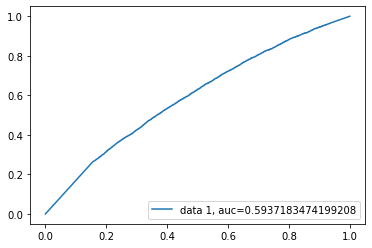

In [72]:
y_pred_proba = logreg.predict_proba(x_test_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.3070644830009189

In [74]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

10.605833458649812

In [63]:
f1_score(y_test,y_pred)

0.1930723215245191

# Decision Tree

In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", random_state=40)

In [76]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for train/test dataset
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [77]:
classes = ['Non-Fraud','Fraud']

In [78]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9999729742512179
Test score 0.8811685854818658
Train Confusion matrix


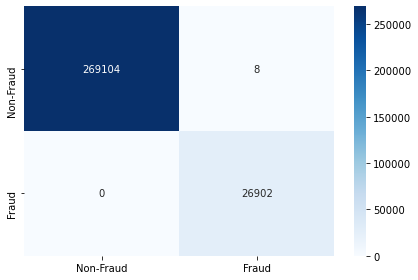

Test Confusion matrix


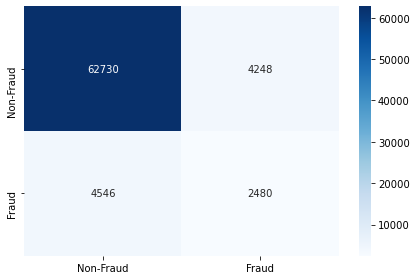

In [79]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

## Pre-Prunning

In [80]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [81]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=12, min_samples_split=3)

Train score 0.9172708047592344
Test score 0.9116534241392357
Train Confusion matrix


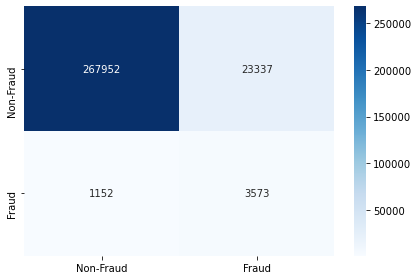

Test Confusion matrix


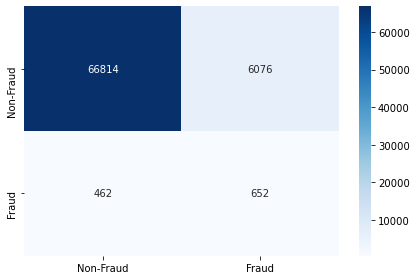

In [82]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

## Post Prunning

In [83]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 9.79193796e-07 1.12607287e-06 ... 1.21937741e-03
 1.44749312e-03 3.00225988e-03]


In [84]:
ccp_alphas = [0.00000000e+00, 8.44554649e-07,1.12607287e-06, 2.00190732e-06, 3.00286098e-06, 4.00749461e-06, 
              4.50429146e-06, 5.06732790e-06, 6.08079348e-06, 7.10695004e-06, 1.00186986e-05, 2.65367804e-05,
              3.91107637e-05, 4.27735486e-05, 5.73948304e-05, 6.11006488e-05, 7.20649402e-05, 8.71908433e-05, 
              9.56183319e-05, 0.00016608, 0.00017035, 0.0001871, 0.00026861, 0.00042659, 0.00052418, 
              0.00062436, 0.00076177, 0.00089972, 0.00090666, 0.00092514, 0.00103783, 0.00125498]


In [85]:
ccp_alphas[:20]

[0.0,
 8.44554649e-07,
 1.12607287e-06,
 2.00190732e-06,
 3.00286098e-06,
 4.00749461e-06,
 4.50429146e-06,
 5.0673279e-06,
 6.08079348e-06,
 7.10695004e-06,
 1.00186986e-05,
 2.65367804e-05,
 3.91107637e-05,
 4.27735486e-05,
 5.73948304e-05,
 6.11006488e-05,
 7.20649402e-05,
 8.71908433e-05,
 9.56183319e-05,
 0.00016608]

In [86]:
# For each alpha we will append our model to a list

clf_tic = time.time()

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

clf_toc = time.time() - clf_tic
print('clf training completed in %.2f s.' % (clf_toc))

clf training completed in 363.76 s.


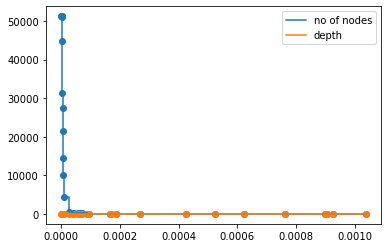

In [87]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

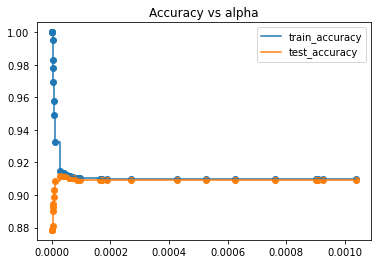

In [88]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.00020

Train score 0.9999729742512179
Test score 0.8785741311280472
Train Confusion matrix


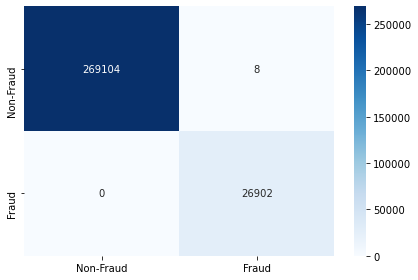

Test Confusion matrix


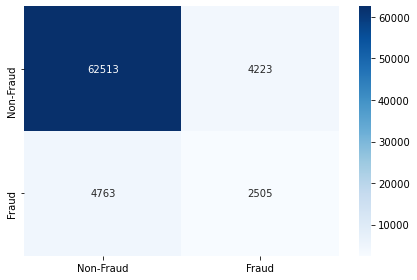

In [89]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=8.44554649e-07)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [90]:
f1_score(y_test, y_test_pred)

0.357959416976279

In [92]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8785741311280472


In [93]:
log_loss(y_test, y_test_pred)

4.193952396724873

In [94]:
mean_squared_error(y_test, y_test_pred)

0.12142586887195286

[Text(133.92000000000002, 181.2, 'X[128] <= 0.5\ngini = 0.165\nsamples = 296014\nvalue = [269104, 26910]'),
 Text(66.96000000000001, 108.72, 'gini = 0.08\nsamples = 113333\nvalue = [108605, 4728]'),
 Text(200.88000000000002, 108.72, 'X[61] <= 0.5\ngini = 0.213\nsamples = 182681\nvalue = [160499, 22182]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.209\nsamples = 181327\nvalue = [159846, 21481]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.499\nsamples = 1354\nvalue = [653, 701]')]

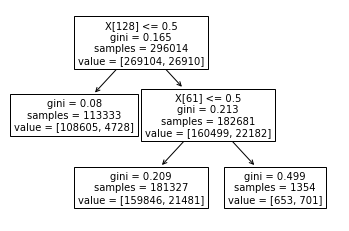

In [95]:
from sklearn import tree
tree.plot_tree(clf)

In [96]:
pip install pydotplus

     |████████████████████████████████| 278 kB 27.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=5c461ceec30ff29a6f92611b18d82199901d802c6245bd94a538ce396cf41dc1
  Stored in directory: /home/ec2-user/.cache/pip/wheels/1f/5c/ba/f931f74fcac8f48b18ae597279203b1c1f92fc76249c2b6f66
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [97]:
F_var = x_test.columns

In [98]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = F_var,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

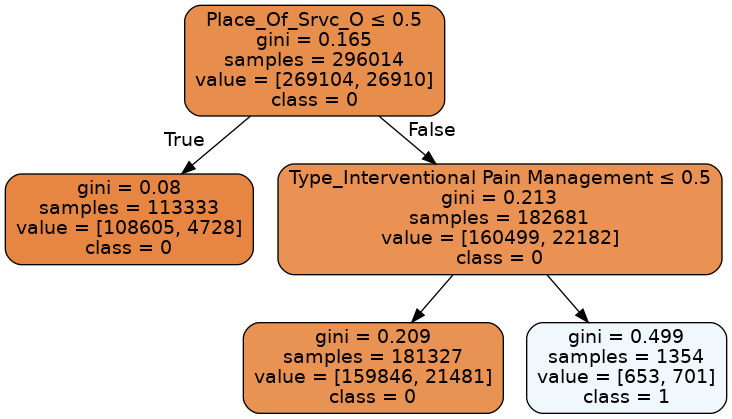

In [99]:
Image(graph.create_png())

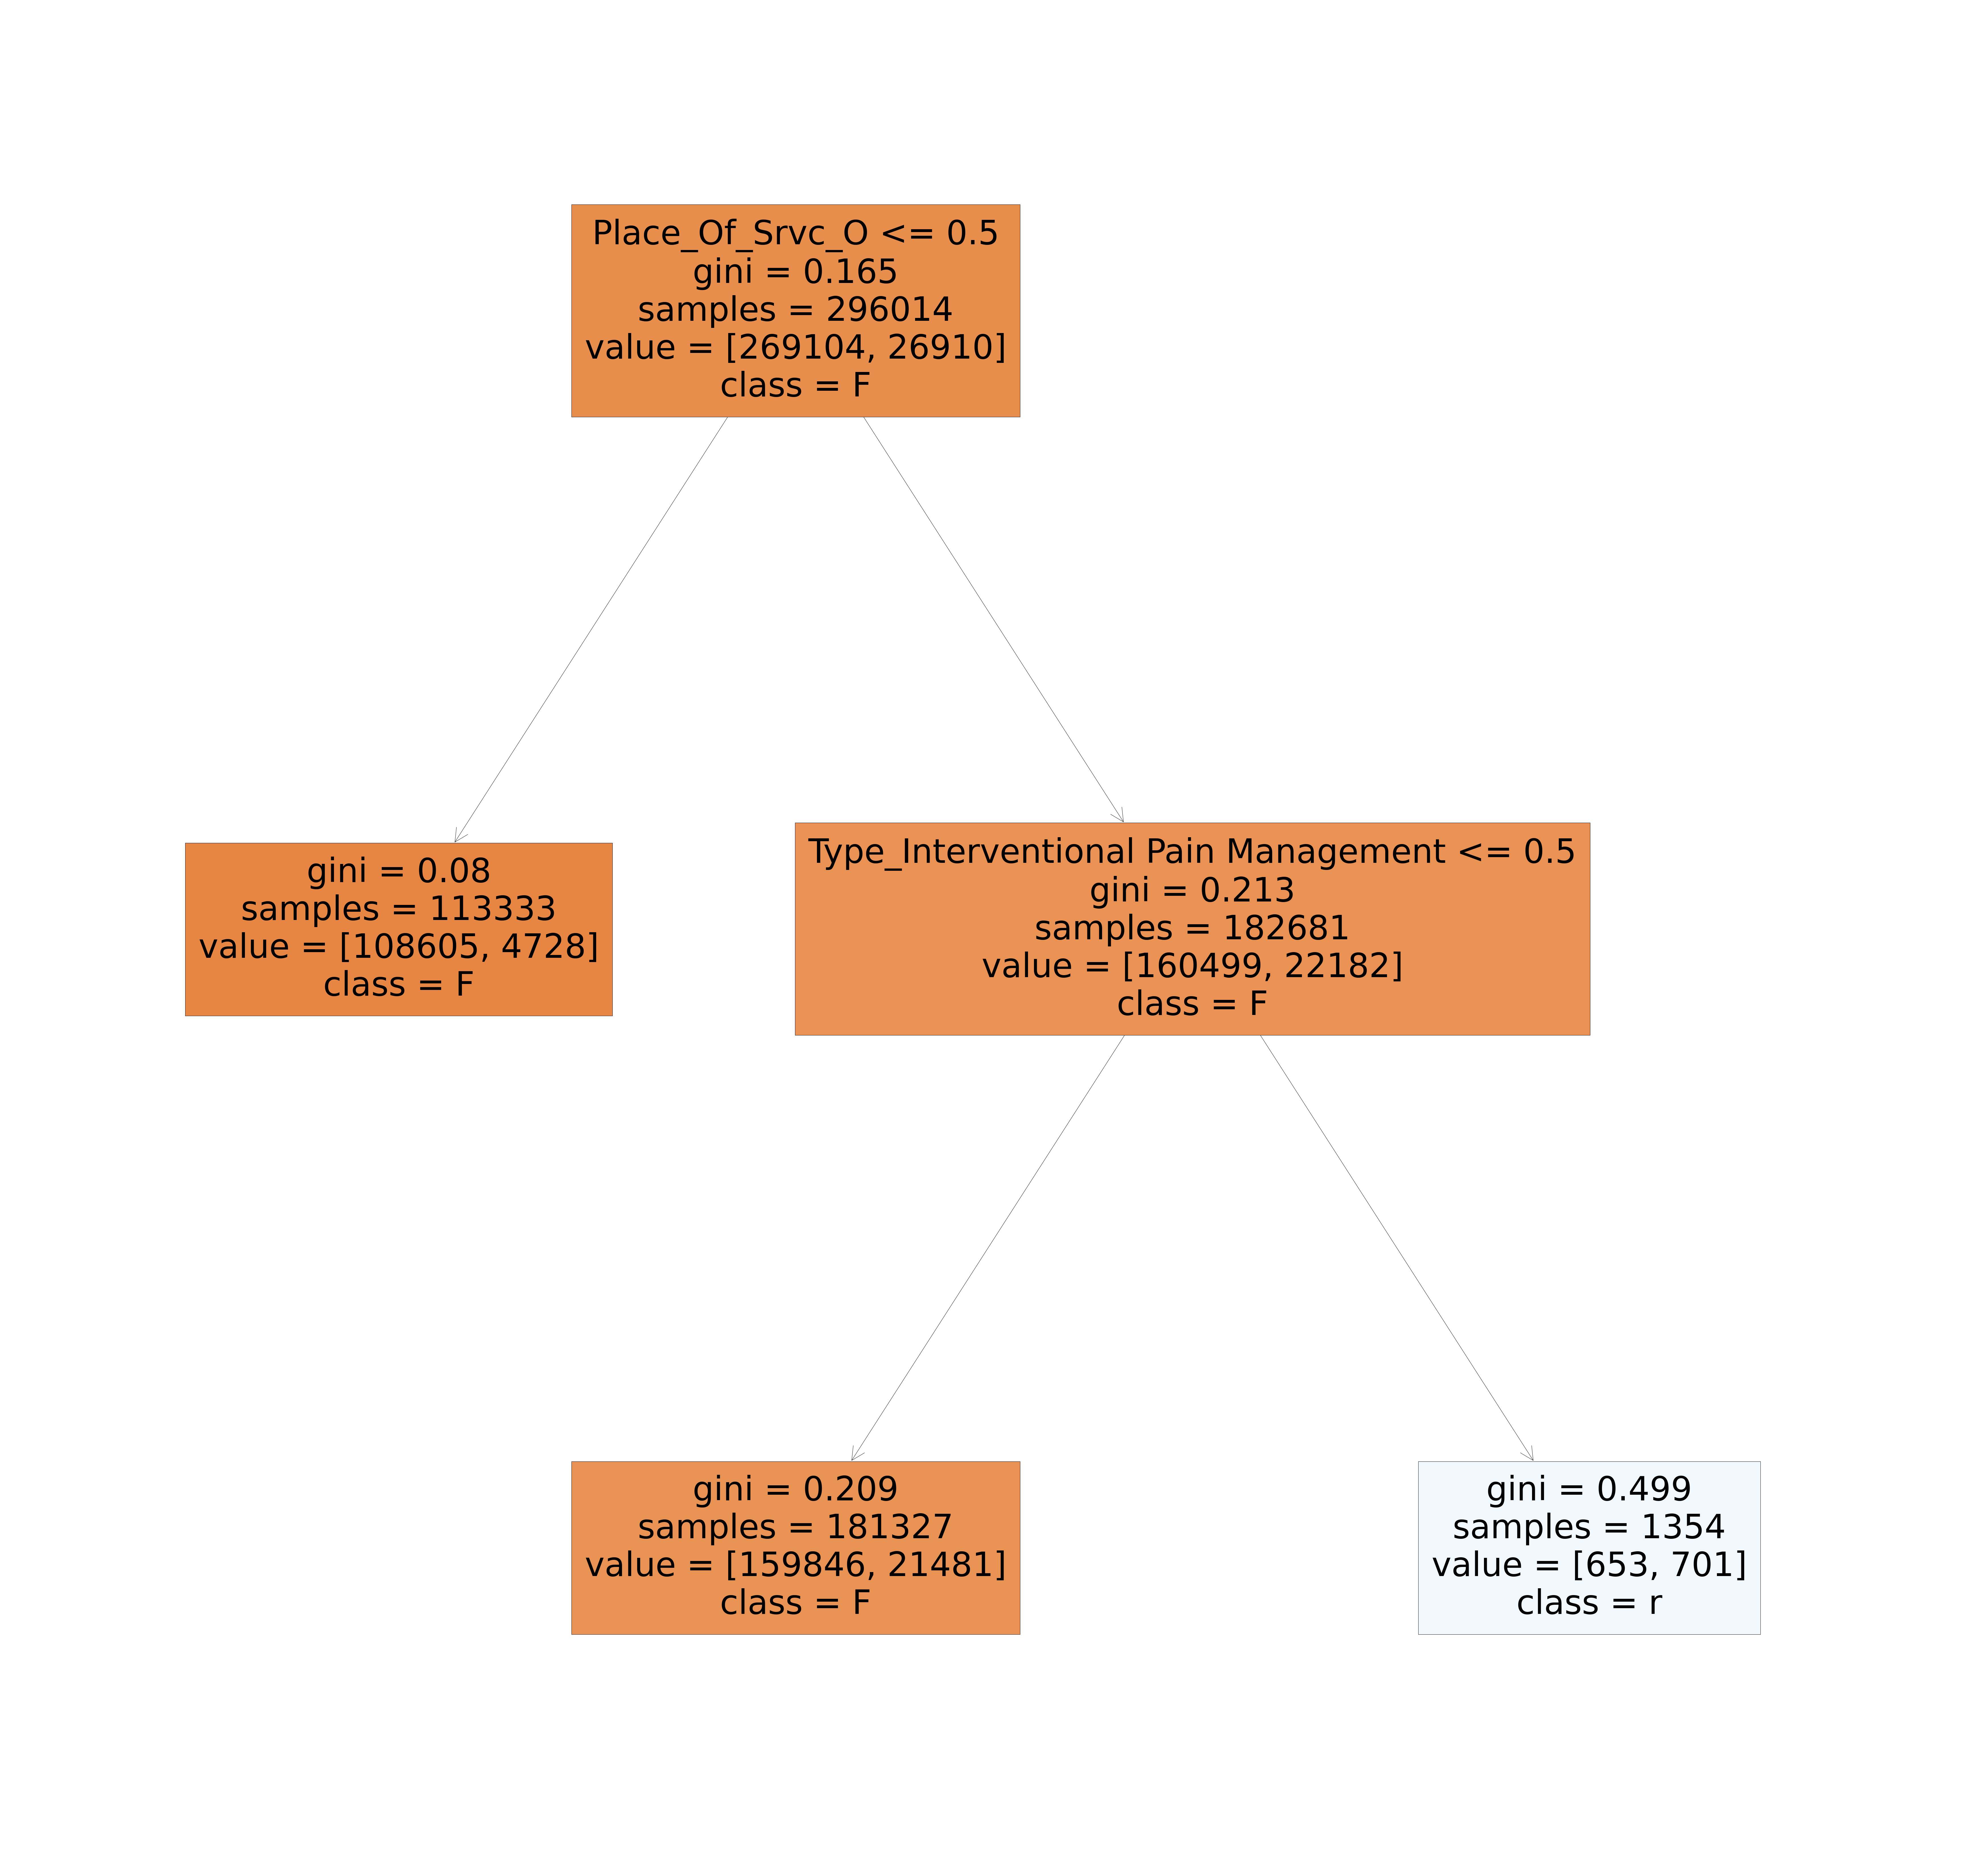

In [100]:
fig = plt.figure(figsize=(125,120))
_ = tree.plot_tree(clf, 
                   feature_names=F_var,  
                   class_names=y_var,
                   filled=True)